In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

In [2]:
gene_ont_samples = {
    'BICCN_central':'../outputs/gene_ontology/MOp_central_10X_ontology.csv',
    'BICCN_periph':'../outputs/gene_ontology/MOp_peripheral_ReadZs_gene_ontology.csv',
    'BICCN_punctate':'../outputs/gene_ontology/MOp_punctate_10X_ontology.csv',
    'BICCN_radial':'../outputs/gene_ontology/MOp_radial_ReadZs_gene_ontology.csv',
    'Brainmap_central':'../outputs/gene_ontology/Viz_central.csv',
    'Brainmap_periph':'../outputs/gene_ontology/Vizgen_Brainmap_peripheral.csv',
    'Brainmap_punctate':'../outputs/gene_ontology/Viz_punctate.csv',
    'Brainmap_radial':'../outputs/gene_ontology/Vizgen_Brainmap_radial.csv',
}

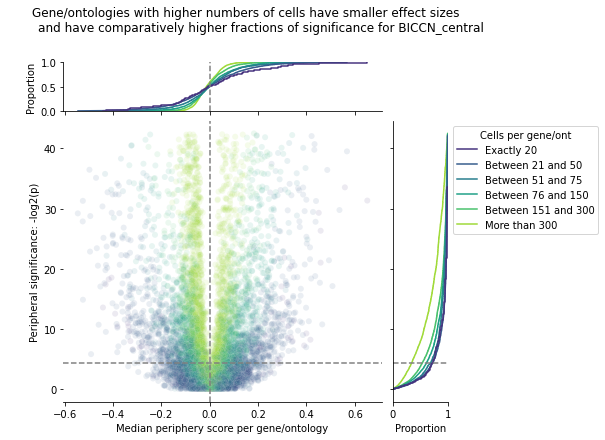

In [5]:
#################################
#
#   Effect on cells per ont on score and significance
#
#################################

for name,p in gene_ont_samples.items():
    df = pd.read_csv(p)
    df = df.dropna()
    
    
    #avoiding -infs by filtering out gene/onts with pvals in the 10th quantile
    p_thresh = df['bh_p'].quantile(0.1)
    vp_df = df[df['bh_p'].gt(p_thresh)].copy()
    vp_df['Peripheral significance: -log2(p)'] = -np.log2(vp_df['bh_p'])

    vp_df.loc[vp_df['num_cells'] == 20, 'Cells per gene/ont'] = 'Exactly 20'
    vp_df.loc[vp_df['num_cells'].between(21,50), 'Cells per gene/ont'] = 'Between 21 and 50'
    vp_df.loc[vp_df['num_cells'].between(51,75), 'Cells per gene/ont'] = 'Between 51 and 75'
    vp_df.loc[vp_df['num_cells'].between(76,150), 'Cells per gene/ont'] = 'Between 76 and 150'
    vp_df.loc[vp_df['num_cells'].between(151,300), 'Cells per gene/ont'] = 'Between 151 and 300'
    vp_df['Cells per gene/ont'] = vp_df['Cells per gene/ont'].fillna('More than 300')

    hue_order = [
        'Exactly 20',
        'Between 21 and 50',
        'Between 51 and 75',
        'Between 76 and 150',
        'Between 151 and 300',
        'More than 300',
    ]


    g = sns.JointGrid(marginal_ticks=True)

    sns.scatterplot(
        x = 'med_score',
        y = 'Peripheral significance: -log2(p)',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        alpha = 0.1,
        data = vp_df,
        legend = False,
        ax = g.ax_joint,
    )

    sns.ecdfplot(
        x = 'med_score',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        legend = False,
        ax=g.ax_marg_x,
    )

    sns.ecdfplot(
        y = 'Peripheral significance: -log2(p)',
        hue = 'Cells per gene/ont',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        #legend = False,
        ax=g.ax_marg_y,
    )

    #Show significance cutoff line -np.log2(0.05) ~= 4.32
    g.ax_joint.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axhline(4.32, linestyle = 'dashed', color = 'grey')

    #Vertical line at 0 median score
    g.ax_joint.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axvline(0, linestyle = 'dashed', color = 'grey')


    g.fig.suptitle(
        """Gene/ontologies with higher numbers of cells have smaller effect sizes
        and have comparatively higher fractions of significance for {}
        """.format(name)
    )
    g.fig.subplots_adjust(top=0.85)
    g.ax_joint.set_xlabel('Median periphery score per gene/ontology')
    g.ax_joint.spines['left'].set_visible(False)

    #g.savefig('tpm_spatial_corrs/expressed_vs_unexpressed_peripheral_scoring_ecdf.svg')
    sns.move_legend(g.ax_marg_y, "upper left", bbox_to_anchor=(1, 1))
    plt.show(g)
    plt.close()
    
    break
    

In [8]:
df['med_gene_frac'] = df['med_gene_spots'].div(df['med_spots'])

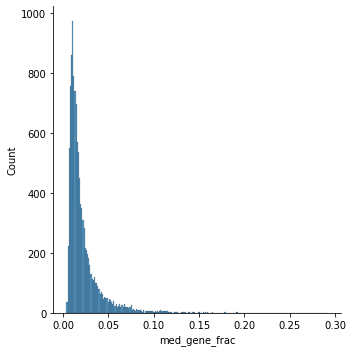

In [9]:
sns.displot(df['med_gene_frac'])
plt.show()
plt.close()

In [16]:
df['med_gene_frac'].quantile(0.9)

0.0423728813559322

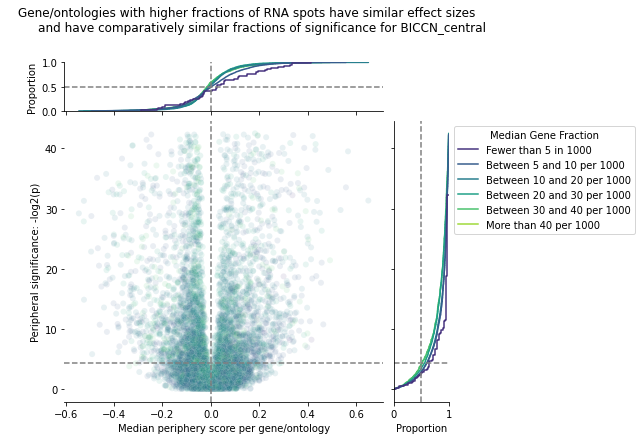

In [23]:
#################################
#
#   Effect on median gene/fraction per ont on score and significance
#
#################################

for name,p in gene_ont_samples.items():
    df = pd.read_csv(p)
    df = df.dropna()
    
    
    #avoiding -infs by filtering out gene/onts with pvals in the 10th quantile
    p_thresh = df['bh_p'].quantile(0.1)
    vp_df = df[df['bh_p'].gt(p_thresh)].copy()
    vp_df['Peripheral significance: -log2(p)'] = -np.log2(vp_df['bh_p'])

    vp_df['med_gene_frac'] = vp_df['med_gene_spots'].div(vp_df['med_spots'])
    
    vp_df.loc[vp_df['med_gene_frac'] < 0.005, 'Median Gene Fraction'] = 'Fewer than 5 in 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.005,0.010), 'Median Gene Fraction'] = 'Between 5 and 10 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.010,0.020), 'Median Gene Fraction'] = 'Between 10 and 20 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.020,0.030), 'Median Gene Fraction'] = 'Between 20 and 30 per 1000'
    vp_df.loc[vp_df['med_gene_frac'].between(0.030,0.040), 'Median Gene Fraction'] = 'Between 30 and 40 per 1000'
    vp_df['Cells per gene/ont'] = vp_df['Median Gene Fraction'].fillna('More than 40 per 1000')

    hue_order = [
        'Fewer than 5 in 1000',
        'Between 5 and 10 per 1000',
        'Between 10 and 20 per 1000',
        'Between 20 and 30 per 1000',
        'Between 30 and 40 per 1000',
        'More than 40 per 1000',
    ]


    g = sns.JointGrid(marginal_ticks=True)

    sns.scatterplot(
        x = 'med_score',
        y = 'Peripheral significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        alpha = 0.1,
        data = vp_df,
        legend = False,
        ax = g.ax_joint,
    )

    sns.ecdfplot(
        x = 'med_score',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        legend = False,
        ax=g.ax_marg_x,
    )

    sns.ecdfplot(
        y = 'Peripheral significance: -log2(p)',
        hue = 'Median Gene Fraction',
        hue_order = hue_order,
        palette = 'viridis',
        data = vp_df,
        #legend = False,
        ax=g.ax_marg_y,
    )

    #Show significance cutoff line -np.log2(0.05) ~= 4.32
    g.ax_joint.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axhline(4.32, linestyle = 'dashed', color = 'grey')
    g.ax_marg_y.axvline(0.5, linestyle = 'dashed', color = 'grey')

    #Vertical line at 0 median score
    g.ax_joint.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axvline(0, linestyle = 'dashed', color = 'grey')
    g.ax_marg_x.axhline(0.5, linestyle = 'dashed', color = 'grey')


    g.fig.suptitle(
        """Gene/ontologies with higher fractions of RNA spots have similar effect sizes
        and have comparatively similar fractions of significance for {}
        """.format(name)
    )
    g.fig.subplots_adjust(top=0.85)
    g.ax_joint.set_xlabel('Median periphery score per gene/ontology')
    g.ax_joint.spines['left'].set_visible(False)

    #g.savefig('tpm_spatial_corrs/expressed_vs_unexpressed_peripheral_scoring_ecdf.svg')
    sns.move_legend(g.ax_marg_y, "upper left", bbox_to_anchor=(1, 1))
    plt.show(g)
    plt.close()
    
    break
    

In [27]:
samples = {
    'BICCN_central':'../outputs/gene_cell/MOp_central_10X_ontology.csv',
    'BICCN_periph':'../outputs/gene_cell/MOp_peripheral_ReadZs_gene_ontology.csv',
    'BICCN_punctate':'../outputs/gene_cell/MOp_punctate_10X_ontology.csv',
    'BICCN_radial':'../outputs/gene_cell/MOp_radial_ReadZs_gene_ontology.csv',
    'Brainmap_central':'../outputs/gene_cell/Viz_central.csv',
    'Brainmap_periph':'../outputs/gene_cell/Vizgen_Brainmap_peripheral.csv',
    'Brainmap_punctate':'../outputs/gene_cell/Viz_punctate.csv',
    'Brainmap_radial':'../outputs/gene_cell/Vizgen_Brainmap_radial.csv',
    'CZB_kidney_central':'../outputs/gene_cell/CZB_kidney_central.csv',
    'CZB_kidney_periph':'../outputs/gene_cell/CZB_kidney_peripheral.csv',
    'CZB_kidney_punctate':'../outputs/gene_cell/CZB_kidney_punctate.csv',
    'CZB_kidney_radial':'../outputs/gene_cell/CZB_kidney_radial.csv',
    'CZB_liver_central':'../outputs/gene_cell/CZB_liver_central.csv',
    'CZB_liver_periph':'../outputs/gene_cell/CZB_liver_peripheral.csv',
    'CZB_liver_punctate':'../outputs/gene_cell/CZB_liver_punctate.csv',
    'CZB_liver_radial':'../outputs/gene_cell/CZB_liver_radial.csv',
    'SeqF_central':'../outputs/gene_cell/Seq_central.csv',
    'SeqF_periph':'../outputs/gene_cell/SeqFish_peripheral.csv',
    'SeqF_punctate':'../outputs/gene_cell/Seq_punctate.csv',
    'SeqF_radial':'../outputs/gene_cell/SeqFish_radial.csv',
}

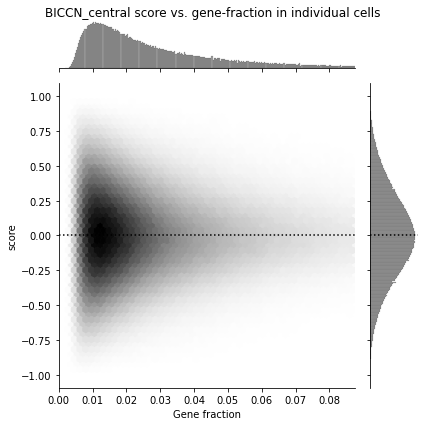

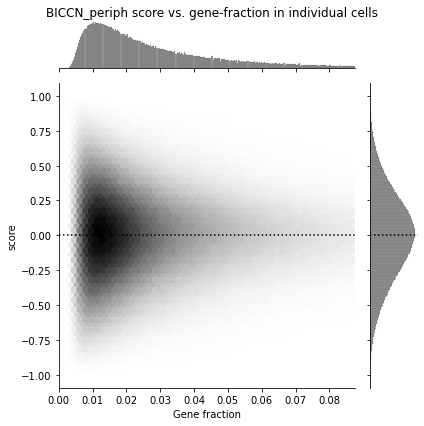

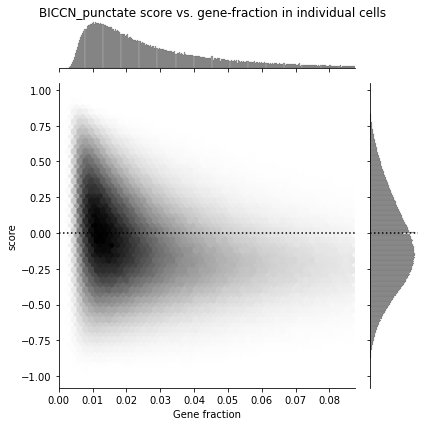

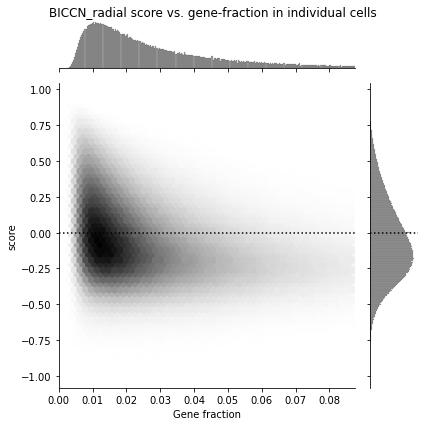

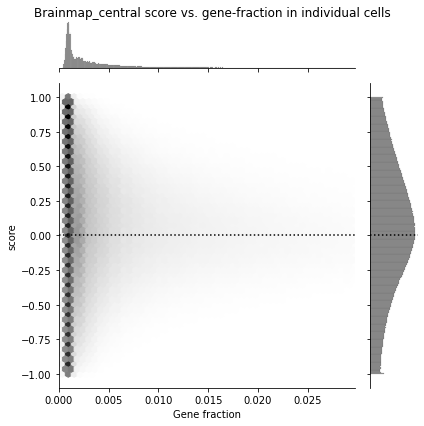

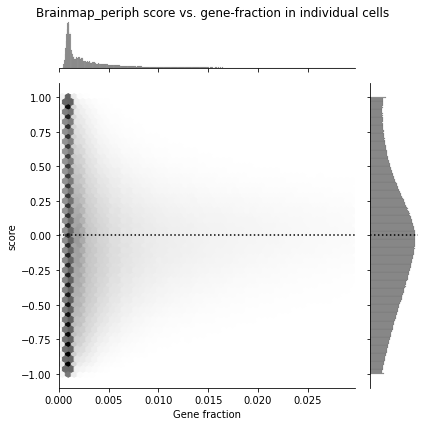

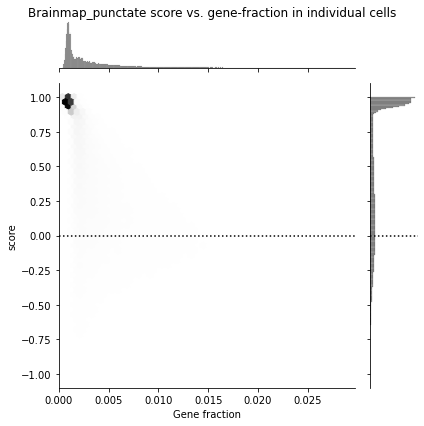

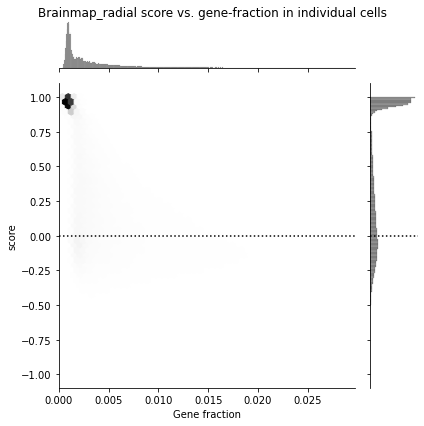

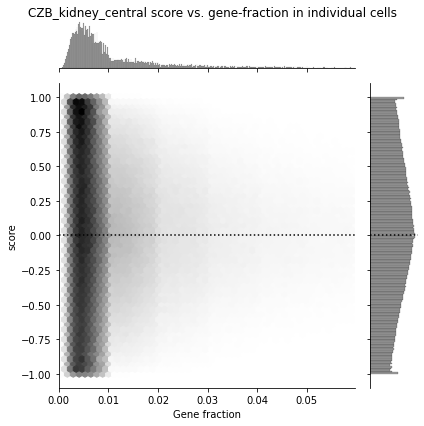

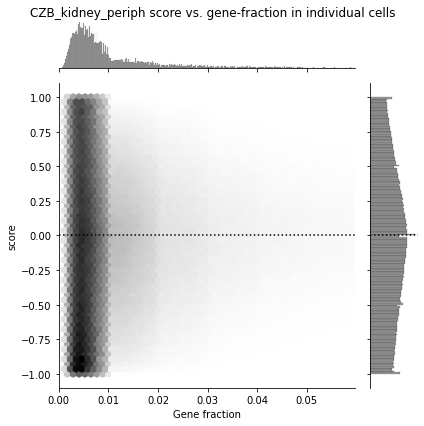

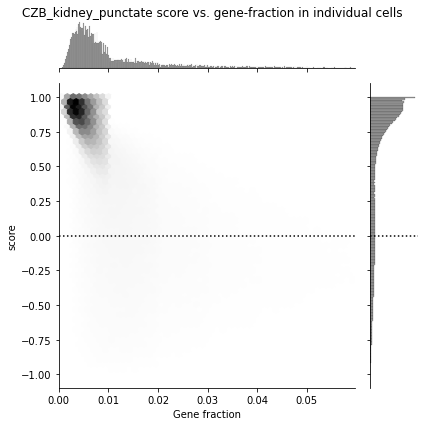

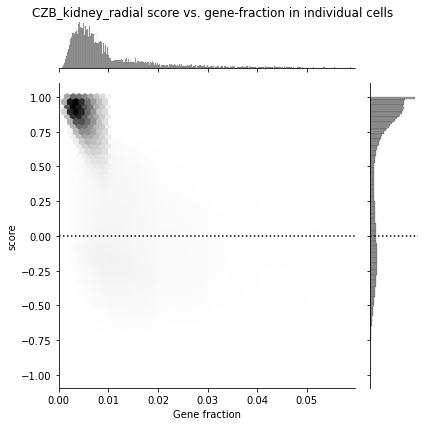

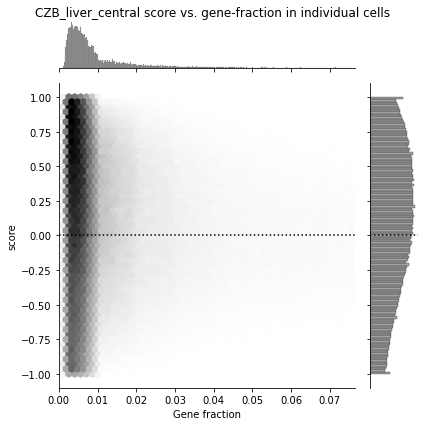

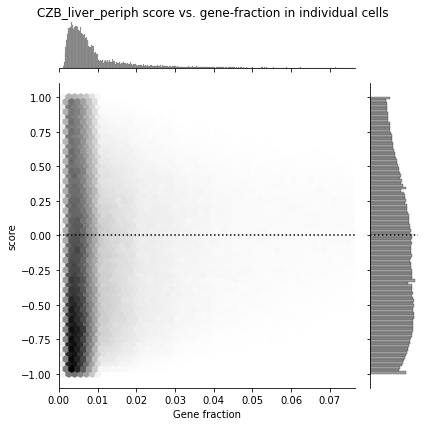

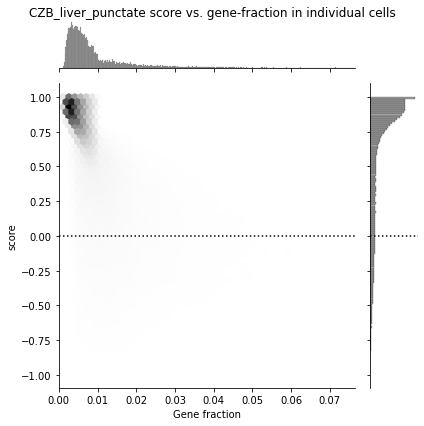

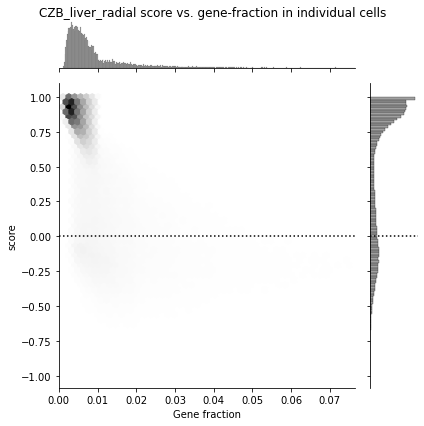

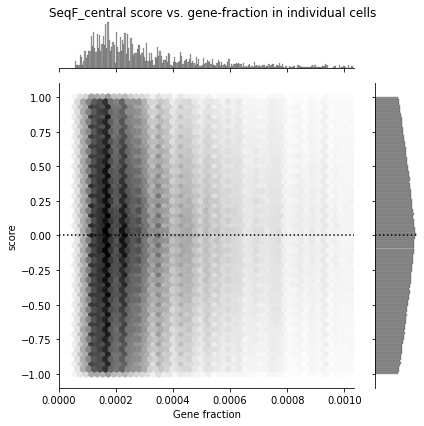

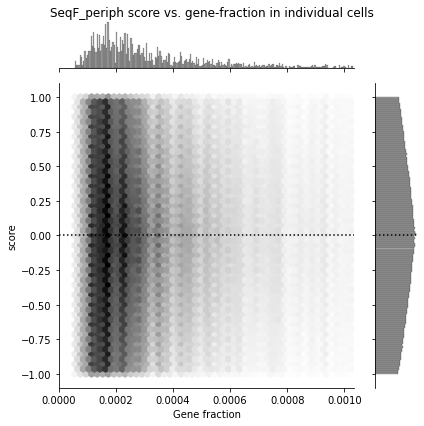

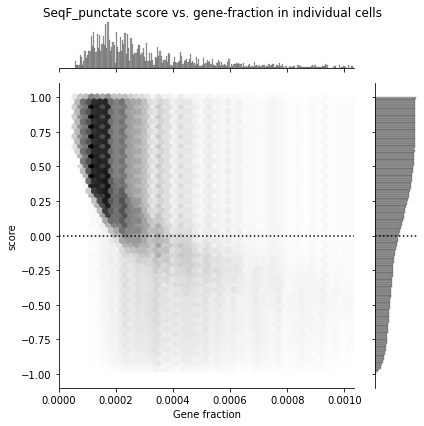

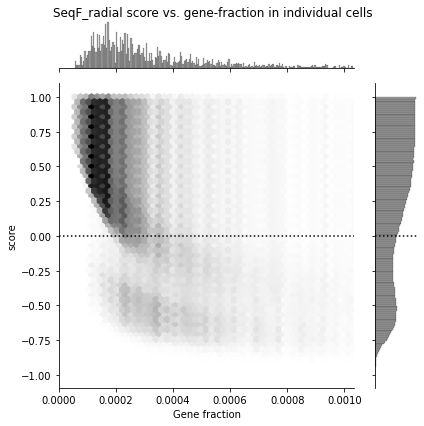

In [28]:
for name,p in samples.items():
    df = pd.read_csv(p)
    df = df.dropna()
    
    df['Gene fraction'] = df['num_gene_spots'].div(df['num_spots'])
    max_frac = df['Gene fraction'].quantile(0.95) #don't plot outliers with very high gene fraction

    p = sns.jointplot(
        x = 'Gene fraction',
        y = 'score',
        kind = 'hex',
        color = 'grey',
        data = df[df['Gene fraction'].le(max_frac)],
    )

    p.ax_joint.axhline(0,linestyle='dotted',color='black')
    p.ax_marg_y.axhline(0,linestyle='dotted',color='black')
    
    p.ax_joint.set_xlim(0,max_frac)
    
    p.fig.suptitle('{} score vs. gene-fraction in individual cells'.format(name))
    p.fig.tight_layout()
    p.fig.subplots_adjust(top=0.95) # Reduce plot to make room #got code from https://stackoverflow.com/questions/60358228/how-to-set-title-on-seaborn-jointplot

    plt.show()
    plt.close()
    

# Understanding the punctate and radial non-symmetrical issue

When plotting the density of scores per gene per cell the I would think that the counts basically HAVE to be symmetrical

There shouldn't be a bias to have un-punctate (negative scores), but that's what the density shows

unless it has something to do with filtering out genes with too few counts maybe?

I think it will be most helpful to use simulated/individual cells to understand the issue

Ok I think I'm starting to understand

Genes with only 1 spot in the cell will always get the best scores, but they are filtered out after scoring! So what's left are worse (more negative scores)

This is only true for radial/punctate as the central/peripheral ranks are less sensitive to number of spots

I can test if this is the case by scoring and NOT filtering afterwards. Actually I already have the unfiltered data that I'll just plot

Ok that was the case for the MOP dataset, but there is a more extreme issue happening with the Vizgen Brainmap dataset.

In [24]:
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')

import SRRS
from SRRS import plotting, scoring, metrics

sample = SRRS.HDF5('../inputs/mouse2sample1.hdf5')
cell = sample.get_cells_by_id(['100024126192764500990464846159908804485'])[0]

rank_f = metrics.punctate
cell = list(map(rank_f,[cell]))[0]

print('Total number of spots in the cell',cell.n)

periph_score_df = list(scoring.iter_scores([cell],'peripheral'))[0]
print('Number of spots in the periph scoring output table',periph_score_df['num_gene_spots'].sum())

punctate_score_df = list(scoring.iter_scores([cell],'punctate'))[0]
print('Number of spots in the punctate scoring output table',punctate_score_df['num_gene_spots'].sum())

cell

Total number of spots in the cell 869
Number of spots in the periph scoring output table 869
Number of spots in the punctate scoring output table 869


Cell-100024126192764500990464846159908804485-L45_IT_3

In [27]:
punctate_score_df.sort_values('median_rank')

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,median_rank,score,variance
50,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Pde11a,1,1.0,1.000000,0.334101
108,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Asic4,1,2.0,0.997696,0.334101
78,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Fosb,1,3.0,0.995392,0.334101
79,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Grik1,1,4.0,0.993088,0.334101
80,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Pld5,1,5.0,0.990783,0.334101
...,...,...,...,...,...,...,...,...,...
3,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Rfx3,3,636.0,-0.463134,0.199999
84,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Ptprm,7,637.0,-0.465438,0.110597
42,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Ptprt,16,670.0,-0.541475,0.051502
29,punctate,100024126192764500990464846159908804485,L45_IT_3,869,Tcap,6,683.0,-0.571429,0.106771


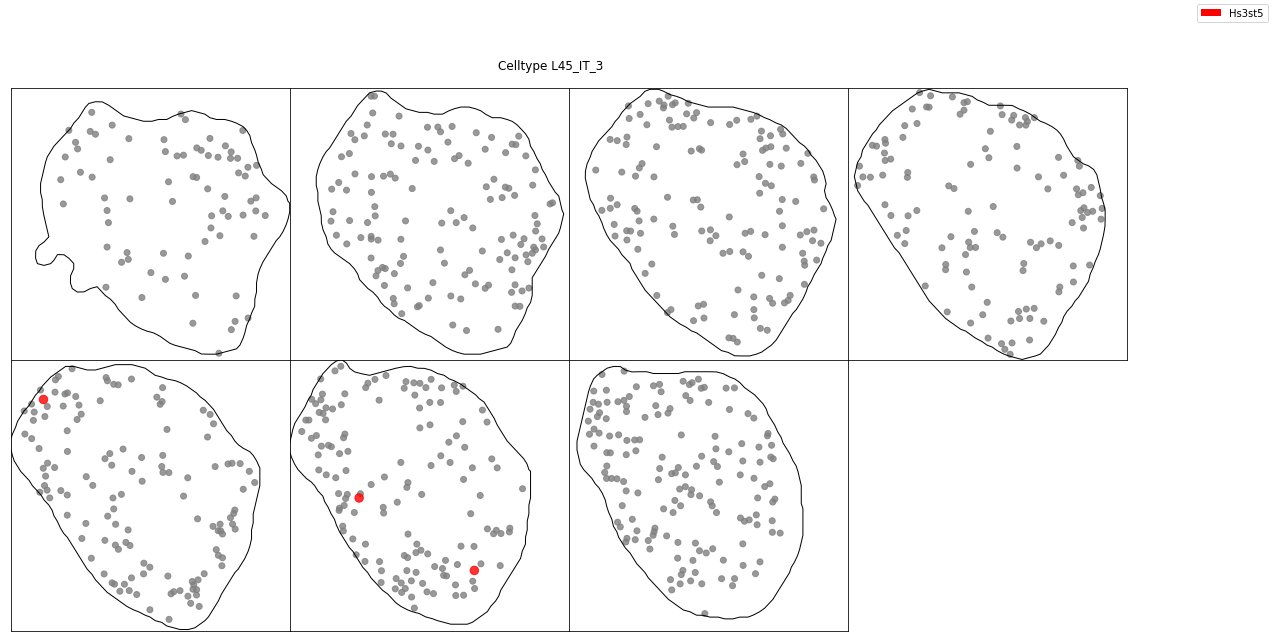

In [31]:
SRRS.plotting.plot_cell_zslices(cell, gene_colors={'Hs3st5':'red'})
plt.show()
plt.close()

In [41]:
#Low num_gene_spots are filtered out after the scoring when the ontology annotations are adjusted
#filtering out happens in /oak/stanford/groups/horence/rob/isoform_localizations/SRRS/analysis/mop_peripheral_to_10X_rz_gene_annots.py
filt_df = pd.read_csv('../outputs/gene_cell/MOp_punctate_10X_ontology.csv')
print(filt_df.shape)
print(filt_df['num_gene_spots'].min())

(6097671, 13)
5


In [39]:
#In the original unfiltered output I expect not to have the density shift problem
unfilt_df = pd.read_csv('../outputs/gene_cell/Merfish_MOp_peripheral.csv')
print(unfilt_df.shape)
unfilt_df['num_gene_spots'].min()

(21605064, 12)


1

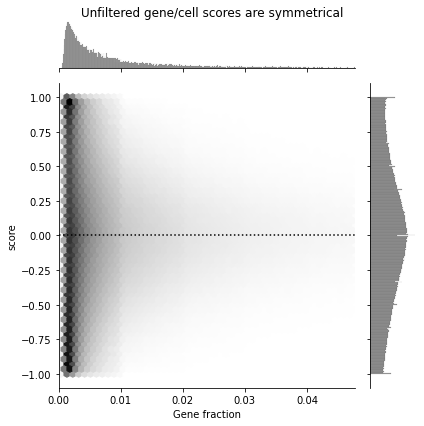

In [45]:
unfilt_df['Gene fraction'] = unfilt_df['num_gene_spots'].div(unfilt_df['num_spots'])
max_frac = unfilt_df['Gene fraction'].quantile(0.95) #don't plot outliers with very high gene fraction

p = sns.jointplot(
    x = 'Gene fraction',
    y = 'score',
    kind = 'hex',
    color = 'grey',
    data = unfilt_df[unfilt_df['Gene fraction'].le(max_frac)],
)

p.ax_joint.axhline(0,linestyle='dotted',color='black')
p.ax_joint.set_xlim(0,max_frac)
p.fig.suptitle('Unfiltered gene/cell scores are symmetrical')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

plt.show()
plt.close()

In [5]:
df['ontology'].value_counts()

L2/3 IT       1016442
L6 CT          516213
L5 IT          479340
L6 IT          385898
L5 ET          238504
Oligo          188841
Pvalb          168574
Astro           87639
L5/6 NP         76576
L6b             72157
Sst             69081
VLMC            51662
SMC             45534
L6 IT Car3      43091
Lamp5           42733
OPC             42168
Endo            24465
Vip             16116
Sncg              337
Name: ontology, dtype: int64

## trying to understand the extreme Vizgen Brainmap plots

The gene/cell counts are not filtered in this table as the filtering takes place during the gene/ontology scoring

so now what I think is the issue is the plotting cutoff at a min fraction of the 95-th quantile maybe? (no)

really strange, is there an issue with how median rank ties are treated?

In [49]:
df = pd.read_csv('../outputs/gene_cell/Viz_punctate.csv')
df.head()

,metric,cell_id,ontology,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id
0,punctate,100017734550312084181135172254070344638,33,1014,Ackr1,3,504.0,0.006910,0.199999,1,3,2,S3R2
1,punctate,100017734550312084181135172254070344638,33,1014,Adcyap1r1,2,462.5,0.088845,0.166831,1,3,2,S3R2
2,punctate,100017734550312084181135172254070344638,33,1014,Adgra2,1,41.0,0.921027,0.333991,1,3,2,S3R2
3,punctate,100017734550312084181135172254070344638,33,1014,Adgrb1,18,236.5,0.535044,0.046665,1,3,2,S3R2
4,punctate,100017734550312084181135172254070344638,33,1014,Adgrb3,11,449.0,0.115499,0.076314,1,3,2,S3R2


In [52]:
df['num_gene_spots'].min()

1

In [55]:
df['Gene fraction'].quantile(0.95)

0.029774127310061602

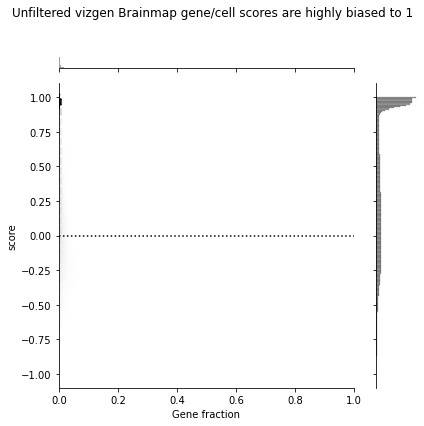

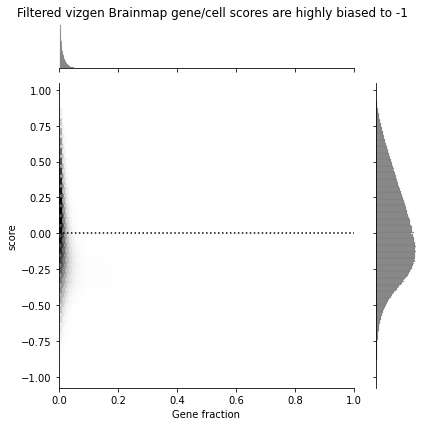

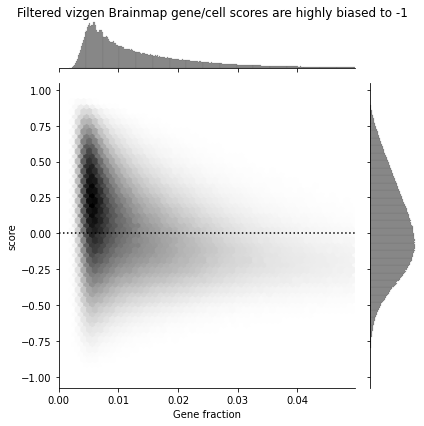

In [84]:
df['Gene fraction'] = df['num_gene_spots'].div(df['num_spots'])
max_frac = 1

p = sns.jointplot(
    x = 'Gene fraction',
    y = 'score',
    kind = 'hex',
    color = 'grey',
    data = df[df['Gene fraction'].le(max_frac)],
)

p.ax_joint.axhline(0,linestyle='dotted',color='black')
p.ax_joint.set_xlim(0,max_frac)
p.fig.suptitle('Unfiltered vizgen Brainmap gene/cell scores are highly biased to 1')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

plt.show()
plt.close()

##################################
filt_df = df[df['num_gene_spots'].ge(5)] #filtering
p = sns.jointplot(
    x = 'Gene fraction',
    y = 'score',
    kind = 'hex',
    color = 'grey',
    data = filt_df[filt_df['Gene fraction'].le(max_frac)],
)

p.ax_joint.axhline(0,linestyle='dotted',color='black')
p.ax_joint.set_xlim(0,max_frac)
p.fig.suptitle('Filtered vizgen Brainmap gene/cell scores are negatively biased')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

plt.show()
plt.close()

#############
#filtered zoom in
max_frac = filt_df['Gene fraction'].quantile(0.95)
p = sns.jointplot(
    x = 'Gene fraction',
    y = 'score',
    kind = 'hex',
    color = 'grey',
    data = filt_df[filt_df['Gene fraction'].le(max_frac)],
)

p.ax_joint.axhline(0,linestyle='dotted',color='black')
p.ax_joint.set_xlim(0,max_frac)
p.fig.suptitle('Filtered vizgen Brainmap gene/cell scores are negatively biased')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

plt.show()
plt.close()


### lets look at an individual cell which I'd think would need to have a uniform dist of scores


definitely NOT UNIFORM

I guess it can make sense since genes with only one spot per cell are all going to automatically be given the lowest ranks and their medians will just be those ranks. Then any gene with more spots in the cell will be given the large ranks

ok I think I understand the issue well now. I'm just going to go for a quick walk and then I'll work on fixing it

basically, I should not be scoring and throwing away genes. I should just not score them from the start? because they are "stealing" the good ranks from the genes I actually care about?

no that's not really the issue. that's desired behavior. the issue is that for these metrics, genes with fewer spots will get assigned more punctate/radial scores because I am measuring self-consistency in both cases, and it's easier to be more self-consistent if therre are fewer of you. I'm not normalizing for this

The peripheral/central metrics are symmetrical. Having fewer spots results in more extreme scores, which is corrected for, but not in one specific direction

I basically need entirely new radial/punctate measures? I can go stand at a whiteboard and try to think of something better

In [57]:
sub_df = df[df['cell_id'].eq('100017734550312084181135172254070344638')]
sub_df

,metric,cell_id,ontology,num_spots,gene,num_gene_spots,median_rank,score,variance,mouse,sample,replicate,sample_id,Gene fraction
0,punctate,100017734550312084181135172254070344638,33,1014,Ackr1,3,504.0,0.006910,0.199999,1,3,2,S3R2,0.002959
1,punctate,100017734550312084181135172254070344638,33,1014,Adcyap1r1,2,462.5,0.088845,0.166831,1,3,2,S3R2,0.001972
2,punctate,100017734550312084181135172254070344638,33,1014,Adgra2,1,41.0,0.921027,0.333991,1,3,2,S3R2,0.000986
3,punctate,100017734550312084181135172254070344638,33,1014,Adgrb1,18,236.5,0.535044,0.046665,1,3,2,S3R2,0.017751
4,punctate,100017734550312084181135172254070344638,33,1014,Adgrb3,11,449.0,0.115499,0.076314,1,3,2,S3R2,0.010848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,punctate,100017734550312084181135172254070344638,33,1014,Syt4,20,485.5,0.043435,0.042562,1,3,2,S3R2,0.019724
112,punctate,100017734550312084181135172254070344638,33,1014,Tjap1,4,236.5,0.535044,0.133201,1,3,2,S3R2,0.003945
113,punctate,100017734550312084181135172254070344638,33,1014,Tshr,1,24.0,0.954590,0.333991,1,3,2,S3R2,0.000986
114,punctate,100017734550312084181135172254070344638,33,1014,Tyro3,12,527.0,-0.038500,0.065347,1,3,2,S3R2,0.011834


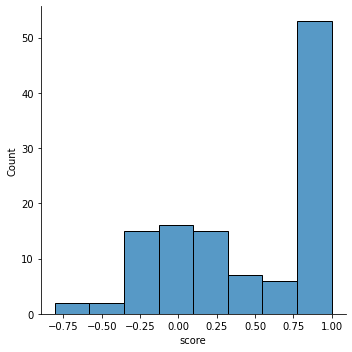

In [59]:
sns.displot(sub_df['score'])
plt.show()
plt.close()

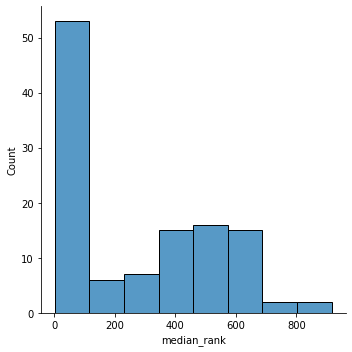

In [60]:
#the median ranks are also biased towards being very small
sns.displot(sub_df['median_rank'])
plt.show()
plt.close()

In [82]:
#There are 116 genes
print(sub_df.shape)

#There are 1014 ranks to hand out
print(sub_df['num_gene_spots'].sum())

#The expected median rank is 507.5

#50 genes only have a single spot
print(sub_df['num_gene_spots'].eq(1).sum())

#These all have median ranks from 1 to 50, ties broken randomly
print(sub_df[sub_df['num_gene_spots'].eq(1)]['median_rank'].max())

#Already 50 of the 116 genes have median values far less than the expected


#88 of the 116 genes have median ranks less than expected (75% of genes)
print(sub_df['median_rank'].lt(507.5).sum())
print(sub_df['score'].gt(0).sum()) #double checking that these all get assigned positive scores

(116, 14)
1014
50
50.0
88
88


50.0

50

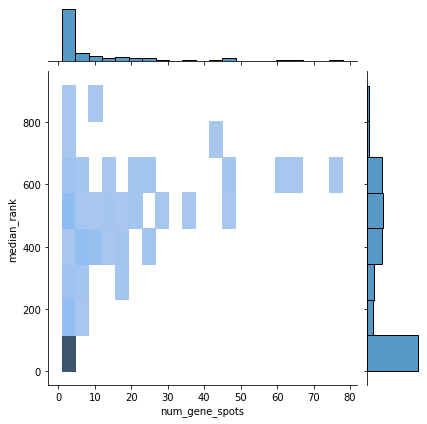

In [63]:
sub_df['median_rank']